## Introduction
Topic Models, in a nutshell, are a type of statistical language models used for uncovering hidden structure in a collection of texts. In a practical and more intuitively, you can think of it as a task of:

**Dimensionality Reduction**, where rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in Vocabulary}, you can represent it in a topic space as {Topic_i: Weight(Topic_i, T) for Topic_i in Topics}

**Unsupervised Learning**, where it can be compared to clustering, as in the case of clustering, the number of topics, like the number of clusters, is an output parameter. By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight

**Tagging**, abstract “topics” that occur in a collection of documents that best represents the information in them.

There are several existing algorithms you can use to perform the topic modeling. The most common of it are, **Latent Semantic Analysis (LSA/LSI), Probabilistic Latent Semantic Analysis (pLSA), and Latent Dirichlet Allocation (LDA)**


In this article, we’ll take a closer look at **LDA**, and implement our first topic model using the sklearn implementation in python 3.6.5

**简而言之**，主题模型: 它是一种统计模型，用于标记出现在文档集合中的抽象“主题”，这些主题最能代表这个文档集合中的信息。


获取主题模型使用了许多技术，如：Latent Semantic Analysis (LSA/LSI), Probabilistic Latent Semantic Analysis (pLSA), and Latent Dirichlet Allocation (LDA)

**本文主要结合LDA+sklearn 来实现，内容通俗易懂~~**


## Theoretical Overview

**根据定义，LDA是给定语料库的生成概率模型。其基本思想是将文档表示为潜在主题的随机混合，并对每个主题通过单词分布进行特征化。**
![LDA的底层算法, http://chdoig.github.io/pytexas2015-topic-modeling/#/3/4](https://www.github.com/Valuebai/my-markdown-img/raw/master/小书匠/1571642518975.png)

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:
psi, the distribution of words for each topic K
phi, the distribution of topics for each document i

我们可以把LDA的处理过程进行如下描述，给定M个文档、N个单词和估计的K个主题, LDA模型训练输出的结果：
- psi，表示每个主题K的单词分布
- phi，表示每个文档 i 的主题分布。

## Parameters of LDA
> **Alpha parameter** is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.

> **Beta parameter** is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

> **α参数**是Dirichlet先验浓度参数,表示文档-主题密度，α值越高，就可以假定文档由更多的主题组成，从而导致每个文档的主题分布更加具体。

> **β参数**与先验浓度参数相同,表示主题词密度的，β值越高，就可以假定主题由大部分单词组成，从而导致每个主题的单词分布更加具体。

## LDA Implementation

[LDA的代码实现，具体看github: https://github.com/kapadias/mediumposts/blob/master/nlp/published_notebooks/Introduction%20to%20Topic%20Modeling.ipynb](https://github.com/kapadias/mediumposts/blob/master/nlp/published_notebooks/Introduction%20to%20Topic%20Modeling.ipynb)

有时候打不开，可以用https://nbviewer.jupyter.org 进行加载

1. Loading data 加载数据

2. Data cleaning 数据清洗
 
3. Exploratory analysis 探索性分析

4. Preparing data for LDA analysis 为LDA分析准备数据

5. LDA model training LDA模型训练

6. Analyzing LDA model results 分析LDA模型结果

gensim的实现流程，参考

![gensim流程](https://www.github.com/Valuebai/my-markdown-img/raw/master/小书匠/1571649222856.png)


## 1. Loading data 加载数据

在本教程中，我们将使用NIPS大会上发表的论文数据集。NIPS大会(神经信息处理系统)是机器学习领域最负盛名的年度事件之一。在每次的NIPS大会上，参会者都会发表大量的研究论文。此CSV文件包含了从1987年到2016年(29年!)发表的不同的NIPS论文的信息。这些论文讨论了机器学习领域的各种各样的主题，从神经网络到优化方法等等。

首先，我们将研究CSV文件，以确定我们可以使用什么类型的数据进行分析，以及它的结构是怎样的。一篇研究论文通常由标题、摘要和正文组成。

```md
nips_papers.csv.gz文件的下载地址
链接：https://pan.baidu.com/s/1su3q9Rr2luU89Kr9K7rPIA&shfl=sharepset 
提取码：jva4 
复制这段内容后打开百度网盘手机App，操作更方便哦
```

In [4]:
# Importing modules
import pandas as pd


# Read data into papers
papers = pd.read_csv('../../data/nips_papers.csv.gz')

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## 2. Data cleaning 数据清洗
 ### **去掉多余列**


对于论文的分析，我们只对与论文相关的文本数据以及论文发表年份感兴趣。由于该文件包含一些元数据，如id和文件名，因此删除所有不包含有用文本信息的列是很有必要的。

In [5]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)
# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


### **删除标点符号/转换为小写**


现在，我们将对论文文本内容执行一些简单的预处理，以便它们更易于分析。我们将使用一个正则表达式来删除标题中的任何标点符号。然后我们将执行小写字母转换。

In [6]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

0    767\n\nself-organization of associative databa...
1    683\n\na mean field theory of layer iv of visu...
2    394\n\nstoring covariance by the associative\n...
3    bayesian query construction for neural\nnetwor...
4    neural network ensembles cross\nvalidation and...
Name: paper_text_processed, dtype: object

## 3. Exploratory analysis 探索性分析


为了验证预处理是否正确执行，我们可以对研究论文的文本创建一个[词云](https://github.com/amueller/word_cloud)。这将给我们一个最常见单词的可视化表示。可视化是理解我们是否仍然在正确的轨道上的关键!此外，它还允许我们在进一步分析文本数据之前验证是否需要对文本数据进行额外的预处理。



Python有大量的开放库!我们将使用Andreas Mueller的wordcloud库，而不是自己开发一种方法来创建词云：

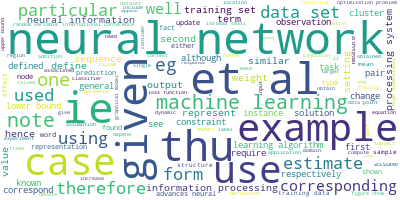

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## 4. Preparing data for LDA analysis 为LDA分析准备数据

LDA不直接处理文本数据。首先，需要将文档转换为简单的向量表示形式。然后，LDA将使用这个表示来确定主题。“文档向量”的每个条目都对应于一个单词在文档中出现的次数(词袋模型，即BOW表示)。



接下来，我们将把标题列表转换为向量列表，所有向量的长度都等于对应的词汇。



然后，我们将根据这个操作的结果(文档向量列表)来标出最常见的10个单词。作为检查，这些单词也应该出现在词云中。 

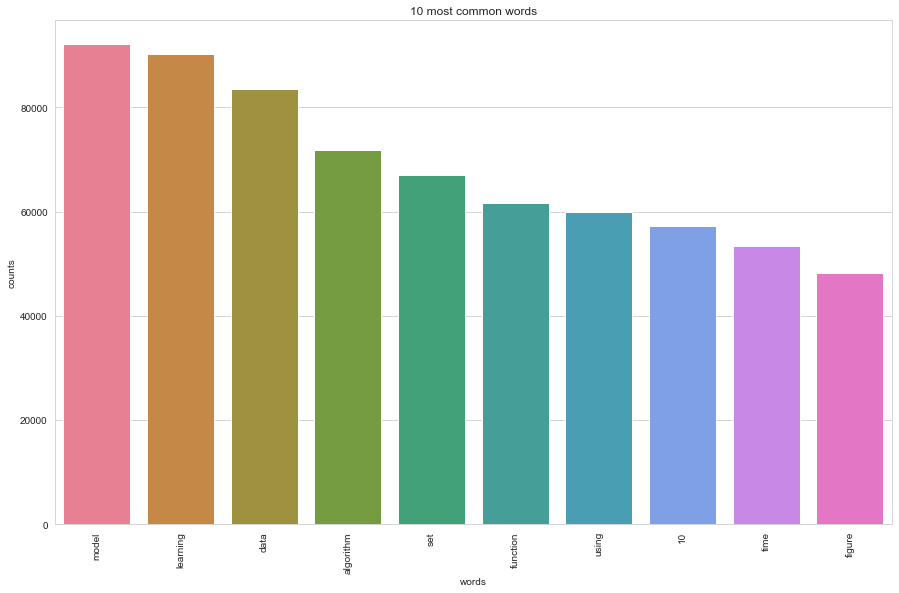

In [9]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['paper_text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## 5. LDA model training and results visualization LDA模型训练和结果视觉化

我们唯一要调整的参数是LDA算法中的主题数量。通常，人们会计算“perplexity（困惑度）”指标来确定多少数量的主题是最好的，然后迭代不同数量的主题，直到找到最低的“perplexity”。在下一篇文章中，我们将介绍模型评估和调优概念，并探讨广泛使用的自然语言处理工具包Gensim。

In [10]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

Topics found via LDA:

Topic #0:
network neural model time input learning figure networks neurons output

Topic #1:
learning algorithm function set bound state optimal problem theorem policy

Topic #2:
model data distribution models log algorithm inference 10 variables gaussian

Topic #3:
model data image training learning using set features images feature

Topic #4:
matrix data algorithm problem learning set 10 function method linear


## 6. Analyzing LDA model results 分析LDA模型结果

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

[pyLDAvis包](https://github.com/bmabey/pyLDAvis)的目的是帮助用户在主题模型中解释适合于文本数据集的主题。pyLDAvis开发的交互式可视化工具对以下两方面都很有帮助:



1. 更好地理解和解释个别主题

2. 更好地理解主题之间的关系。



对于(1),通过使用不同的λ参数，你可以手动选择每个主题以查看其最频繁的和/或“相关的”词语。当你试图为每个主题指定一个人可解释的名称或“含义”时，这将有所帮助。



对于(2)，探索主题间距图（Intertopic Distance Plot ）可以帮助你了解主题之间的关系，包括主题组之间潜在的高级结构。

In [ ]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle
import pyLDAvis
import os

LDAvis_data_filepath = os.path.join('./ldavis_prepared_' + str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'w') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_' + str(number_topics) + '.html')

# 在win10上运行要很久，先中断了，有时间再跑下


# 或者用下面的代码，自己调整下参数
15.可视化主题 - 关键字
现在已经构建了LDA模型，下一步是检查生成的主题和关联的关键字。没有比pyLDAvis包的交互式图表更好的工具，并且设计为与jupyter笔记本一起使用。

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis


## Closing Notes

在过去的十年里，机器学习已经变得越来越流行，最近在计算可用性方面的进步已经导致研究该领域的人数的指数级增长，人们正在寻找如何将新方法结合起来，从而推动自然语言处理领域的发展。通常，我们将主题模型视为黑箱算法，但我希望这篇文章能够阐明它背后的数学原理、直觉和高级代码，并帮助你开始处理任何文本数据。



如上所述，在下一篇文章中，我们将更深入地了解如何评估主题模型的性能，优化超参数，使其能够部署到生产环境中。

## Sources:

- [1] Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
- [2] Distributed Strategies for Topic Modeling. https://www.ideals.illinois.edu/bitstream/handle/2142/46405/ParallelTopicModels.pdf?sequence=2&isAllowed=y
- [3] Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
- [4] A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf

- 原文（英文）发表地址：[Topic Modeling in Python: Latent Dirichlet Allocation (LDA)](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)

- 中文发表地址：[Python中的端对端主题建模: 隐含狄利克雷分布(LDA)](https://mp.weixin.qq.com/s?__biz=MjM5NzU0MzU0Nw==&mid=2651382805&idx=1&sn=440b18df09f2c9e67a6c025d4239093c&scene=0#wechat_redirect)
- 【Me】https://github.com/Valuebai/